<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')

In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,550.999871,681.964409,-117.571437,799.535847
1,0.0,1.0,91.836721,66.187383,-4557.192558,-4389.168454,-758.876834,-3630.291620
2,0.0,2.0,43.398567,38.309032,806.409777,898.117376,393.519975,504.597400
3,0.0,3.0,73.960630,22.781469,71.971171,178.713270,353.593215,-174.879945
4,0.0,4.0,98.540837,89.850536,-3339.254209,-3140.862837,-1329.316335,-1811.546502
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-358.818194,-267.514822,348.940392,-616.455214
19996,999.0,16.0,73.135408,86.171748,-281.333648,-112.026492,-235.040766,123.014274
19997,999.0,17.0,82.400084,40.066726,1835.762322,1968.229132,728.220545,1240.008587
19998,999.0,18.0,65.243162,88.001906,5364.731789,5527.976856,-370.589171,5898.566027


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,550.999871,681.964409,-117.571437,799.535847
1,0.0,1.0,91.836721,66.187383,-4557.192558,-4389.168454,-758.876834,-3630.291620
2,0.0,2.0,43.398567,38.309032,806.409777,898.117376,393.519975,504.597400
3,0.0,3.0,73.960630,22.781469,71.971171,178.713270,353.593215,-174.879945
4,0.0,4.0,98.540837,89.850536,-3339.254209,-3140.862837,-1329.316335,-1811.546502
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-358.818194,-267.514822,348.940392,-616.455214
19996,999.0,16.0,73.135408,86.171748,-281.333648,-112.026492,-235.040766,123.014274
19997,999.0,17.0,82.400084,40.066726,1835.762322,1968.229132,728.220545,1240.008587
19998,999.0,18.0,65.243162,88.001906,5364.731789,5527.976856,-370.589171,5898.566027


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    77.493350  43.471189   550.999871   681.964409  -117.571437   
      1.0    91.836721  66.187383 -4557.192558 -4389.168454  -758.876834   
      2.0    43.398567  38.309032   806.409777   898.117376   393.519975   
      3.0    73.960630  22.781469    71.971171   178.713270   353.593215   
      4.0    98.540837  89.850536 -3339.254209 -3140.862837 -1329.316335   
...                ...        ...          ...          ...          ...   
999.0 15.0   46.138603  35.164769  -358.818194  -267.514822   348.940392   
      16.0   73.135408  86.171748  -281.333648  -112.026492  -235.040766   
      17.0   82.400084  40.066726  1835.762322  1968.229132   728.220545   
      18.0   65.243162  88.001906  5364.731789  5527.976856  -370.589171   
      19.0   73.974682  52.585818  -672.518830  -535.958331   390.233813   

                   e_hat  
rep   index               
0.0   0.0     799.535847  
      1.0   -3630.291620  
      2.0     504.597400  
      3.0    -174.879945  
      4.0   -1811.546502  
...                  ...  
999.0 15.0   -616.455214  
      16.0    123.014274  
      17.0   1240.008587  
      18.0   5898.566027  
      19.0   -926.192144  

[20000 rows x 6 columns]

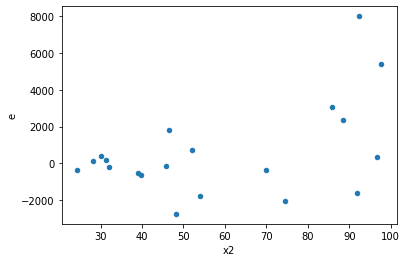

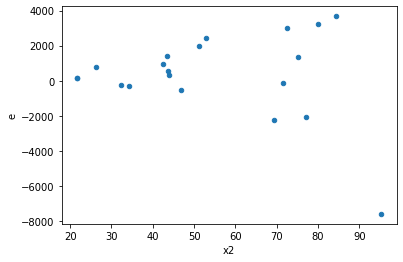

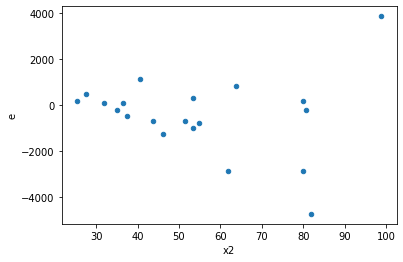

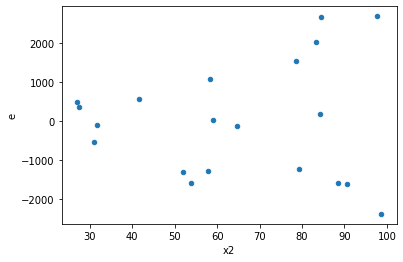

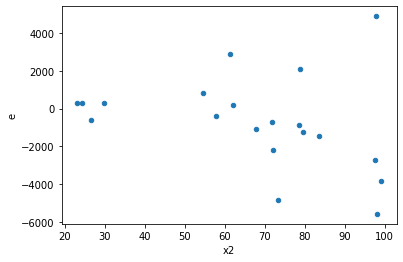

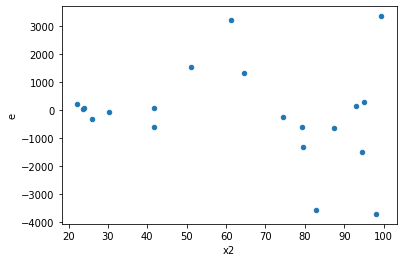

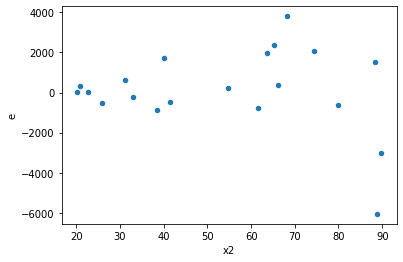

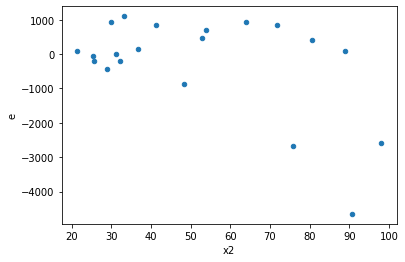

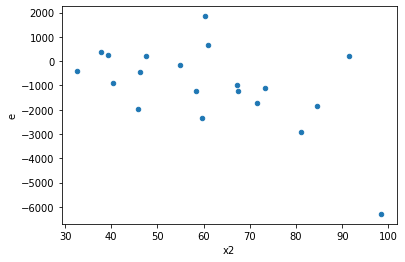

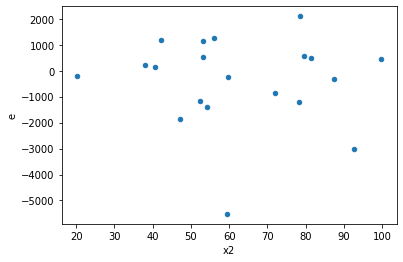

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,6.0,18712149.89093851,54139290.207693115,1871214.9890938508,9023215.034615519,4.822115623916135,0.06729383488138496,0.9663530825593075,0.03364691744069248,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,5673398.538870071,101942969.2116198,709174.8173587589,12742871.151452474,17.968589464177327,0.0004752498464499766,0.999762375076775,0.0002376249232249883,Reject005=0 : Heteroscedasticity
3.0,8.0,8.0,22452278.57546451,58245313.579227105,2806534.8219330637,7280664.197403388,2.5941827411172715,0.19914933199152096,0.9004253340042395,0.09957466599576048,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,7827844.405880233,11926655.055329796,978480.5507350292,1490831.8819162245,1.5236193308046029,0.5651616093463419,0.7174191953268291,0.2825808046731709,Reject005=1 : Homoscedasticity
6.0,11.0,5.0,6137092.151184303,45353335.65859355,557917.468289482,9070667.13171871,16.25808053569007,0.006473492551871907,0.996763253724064,0.0032367462759359533,Reject005=0 : Heteroscedasticity
7.0,9.0,7.0,16132604.885976057,25862104.51138853,1792511.6539973398,3694586.35876979,2.0611226434878582,0.352595021521402,0.823702489239299,0.176297510760701,Reject005=1 : Homoscedasticity
14.0,8.0,8.0,13248376.766174085,75095160.02078353,1656047.0957717607,9386895.002597941,5.668253654479195,0.024185632150471648,0.9879071839247642,0.012092816075235824,Reject005=0 : Heteroscedasticity
15.0,7.0,9.0,4287352.976753323,40064093.92135085,612478.9966790462,4451565.991261206,7.268112074696879,0.00827045450750541,0.9958647727462473,0.004135227253752705,Reject005=0 : Heteroscedasticity
17.0,12.0,4.0,3880130.9854442636,18193118.862982254,323344.24878702196,4548279.715745564,14.066369613214897,0.020828651492726946,0.9895856742536365,0.010414325746363473,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,18712149.89093851,54139290.207693115,1871214.9890938508,9023215.034615519,4.822115623916135,0.06729383488138496,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,5673398.538870071,101942969.2116198,709174.8173587589,12742871.151452474,17.968589464177327,0.0004752498464499766,Reject005=0 : Heteroscedasticity
2.0,9.0,7.0,61438987.21380245,31774655.96285866,6826554.134866939,4539236.566122665,0.6649381923067607,0.5566325488057515,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,22452278.57546451,58245313.579227105,2806534.8219330637,7280664.197403388,2.5941827411172715,0.19914933199152096,Reject005=1 : Homoscedasticity
4.0,6.0,10.0,25167129.875629414,24678805.660125278,4194521.645938235,2467880.566012528,0.5883580475504995,0.5331193448985448,Reject005=1 : Homoscedasticity
5.0,8.0,8.0,7827844.405880233,11926655.055329796,978480.5507350292,1490831.8819162245,1.5236193308046029,0.5651616093463419,Reject005=1 : Homoscedasticity
6.0,11.0,5.0,6137092.151184303,45353335.65859355,557917.468289482,9070667.13171871,16.25808053569007,0.006473492551871907,Reject005=0 : Heteroscedasticity
7.0,9.0,7.0,16132604.885976057,25862104.51138853,1792511.6539973398,3694586.35876979,2.0611226434878582,0.352595021521402,Reject005=1 : Homoscedasticity
8.0,4.0,12.0,58125359.02253599,28490039.460999765,14531339.755633997,2374169.955083314,0.16338272967314085,0.09418182352460494,Reject005=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      521
Reject005=0 : Heteroscedasticity    479
Name: Result_test, dtype: int64